# Data Preparation

Below are the most common python packages used for basic analysis of data. Make sure to import all needed packages before executing a code or it will result to an error.

Download the **salaries for professors** data in csv format from https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read your saved csv data data

In [ ]:
# basic packages for data and plotting
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

# for predictive analysis
from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salaries.csv to Salaries (1).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Salaries.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv')
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
type(data)

pandas.core.frame.DataFrame

View details of your data

In [ ]:
data.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


Remove the first column since we do not need it

In [ ]:
data_fin=data[['rank','discipline','yrs.since.phd','yrs.service','sex','salary']]
data_fin.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [ ]:
data_fin.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [ ]:
type(data_fin)

pandas.core.frame.DataFrame

# Descriptive Analysis

Use summaries, correlation, and visualization to know more about your data

In [ ]:
data_fin.shape

(397, 6)

In [ ]:
data_fin.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


Check how the continous variables are correlated with each other

In [ ]:
correlation_coefficients = data_fin.corr()
correlation_coefficients

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


Create heatmap of correlation coefficients

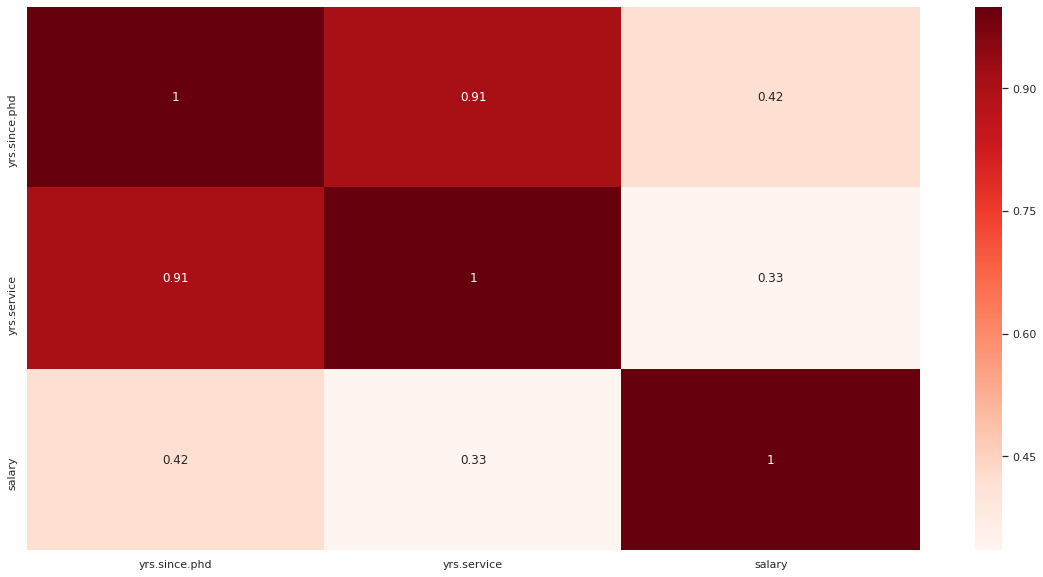

In [ ]:

sns.heatmap(correlation_coefficients, annot=True, cmap='Reds')

Visualize bivariate distributions

In [ ]:
sns.pairplot(data_fin, height=5, cmap = 'Reds')

TypeError: ignored

# Predictive Modelling

# Regression Problem

Objective: Build a predictive model that will explain the effect of rank, discipline, years since phd, years in service, and sex on the professor's salary

Dependent variable: Salary

Independent variables
*   Rank
*   Discipline
*   Years since PhD
*   Years in service
*   Sex







Rank, discipline, and sex are categorical variables. You need to "dumify" them using one hot encoding in order to properly include them in the regression model.

In [ ]:
#dummy_sex = pd.get_dummies(data_fin.sex)
X=data_fin[['sex','rank','discipline']]
dummy = pd.get_dummies(data=X, drop_first=True)
dummy.tail()

,sex_Male,rank_AsstProf,rank_Prof,discipline_B
392,1,0,1,0
393,1,0,1,0
394,1,0,1,0
395,1,0,1,0
396,1,1,0,0


In [ ]:
data_fin=data_fin.join(dummy)
data_fin.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary,sex_Male,rank_AsstProf,rank_Prof,discipline_B
0,Prof,B,19,18,Male,139750,1,0,1,1
1,Prof,B,20,16,Male,173200,1,0,1,1
2,AsstProf,B,4,3,Male,79750,1,1,0,1
3,Prof,B,45,39,Male,115000,1,0,1,1
4,Prof,B,40,41,Male,141500,1,0,1,1


In [ ]:
data_fin2 = data_fin[['yrs.since.phd','yrs.service','salary','sex_Male','rank_AsstProf','rank_Prof','discipline_B']]
data_fin2.head()

,yrs.since.phd,yrs.service,salary,sex_Male,rank_AsstProf,rank_Prof,discipline_B
0,19,18,139750,1,0,1,1
1,20,16,173200,1,0,1,1
2,4,3,79750,1,1,0,1
3,45,39,115000,1,0,1,1
4,40,41,141500,1,0,1,1


In [ ]:
data_fin2.columns

Index(['yrs.since.phd', 'yrs.service', 'salary', 'sex_Male', 'rank_AsstProf',
       'rank_Prof', 'discipline_B'],
      dtype='object')

In [ ]:
# Define Features
features = ['yrs.since.phd', 'yrs.service','sex_Male', 'rank_AsstProf','rank_Prof', 'discipline_B']

# Set X as your independent variables/predictor
X = data_fin2[features]

# Set y as your dependent variables
y = data_fin2['salary']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 514)

In [ ]:
# Initialize model
model = LinearRegression()

In [ ]:
# Fit Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# get coefficients
coefficient = model.coef_

# get intercept
intercept = model.intercept_

In [ ]:
# print coefficient
coefficient

array([   -94.94266505,    106.42031488,   2919.10706114, -13881.03328947,
        32485.36301038,  13420.67984673])

In [ ]:
# print intercept
intercept

83721.44455838494

In [ ]:
# calculate the R-squared
model.score(X_test, y_test)

0.4314945222410872

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_ * 1000))), columns = ['Features', 'Coefficients'])

# print table of coefficients for contribution chart
coefficients_pd

,Features,Coefficients
0,yrs.since.phd,-9.494267e+04
1,yrs.service,1.064203e+05
2,sex_Male,2.919107e+06
3,rank_AsstProf,-1.388103e+07
4,rank_Prof,3.248536e+07
5,discipline_B,1.342068e+07


Given a new data point, what will the predicted salary?

In [ ]:
# We input new advertising data into the model to predict future sales

# 'yrs.since.phd', 'yrs.service','sex_Male', 'rank_AsstProf','rank_Prof', 'discipline_B'
new_data = [[5,10,0,0,1,0]]
model.predict(new_data)

array([116796.29739231])

Calculate the Model Error

In [ ]:
# Root mean squared error
np.sqrt(mse(y_predicted, y_test))

22881.863616877938

# Classification Problem

In [ ]:
from sklearn.model_selection import train_test_split # split dataset

from sklearn.linear_model import LogisticRegression # linear model for classification

from sklearn.metrics import confusion_matrix

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving Admit.csv to Admit.csv


In [ ]:
import io
data_cat = pd.read_csv(io.BytesIO(uploaded['Admit.csv']))

In [ ]:
data_cat.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [ ]:
data_cat.columns

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [ ]:
# write list of features we want to use
features = ['gre', 'gpa', 'rank']

# Set X
X = data_cat[features]

# Set y
y= data_cat['admit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 514)

In [ ]:
# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)

# metrics (accuracy)
acc = log_reg.score(X_test, y_test)


# predictions
y_pred = log_reg.predict(X_test)

In [ ]:
# feature importance
log_reg.coef_

array([[ 0.00182458,  0.46298941, -0.6216837 ]])

In [ ]:
# accuracy
acc

0.7

In [ ]:
# confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[101,   6],
       [ 42,  11]])